Statstics Models
1. AR
2. MA
3. ARMA
4. ARIMA

In [31]:
# 1. AR (AUTORegressive)
from statsmodels.tsa.ar_model import AutoReg
import pandas as pd
df = pd.read_csv('/content/covid_19_india.csv')
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [32]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,,,
2020-01-30,1,6:00 PM,Kerala,1,0,0,0,1
2020-01-31,2,6:00 PM,Kerala,1,0,0,0,1
2020-02-01,3,6:00 PM,Kerala,2,0,0,0,2
2020-02-02,4,6:00 PM,Kerala,3,0,0,0,3
2020-02-03,5,6:00 PM,Kerala,3,0,0,0,3


In [35]:
p = 1
ar_model = AutoReg(df['Confirmed'],lags=p)
ar_model_fit = ar_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [36]:
print('Coefficients:', ar_model_fit.params)

Coefficients: const           261440.283074
Confirmed.L1         0.131603
dtype: float64


In [38]:
predict = ar_model_fit.predict(start=p, end=len(df['Confirmed']) - 1)
predict

Date
2020-01-31   NaN
2020-02-01   NaN
2020-02-02   NaN
2020-02-03   NaN
2020-02-04   NaN
              ..
2021-08-11   NaN
2021-08-11   NaN
2021-08-11   NaN
2021-08-11   NaN
2021-08-11   NaN
Length: 18109, dtype: float64

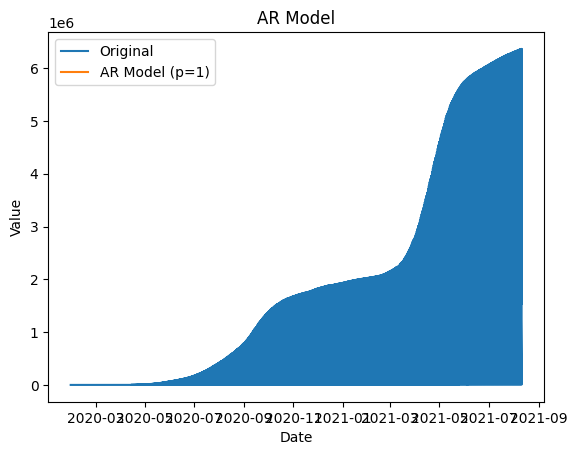

In [40]:
import matplotlib.pyplot as pt
pt.plot(df['Confirmed'], label='Original')
pt.plot(predict, label='AR Model (p=1)')
pt.title('AR Model')
pt.xlabel('Date')
pt.ylabel('Value')
pt.legend()
pt.show()

In [47]:
# 2. MA(Moving Average)
from statsmodels.tsa.statespace.sarimax import SARIMAX
q=1
ma_model = SARIMAX(df['Confirmed'], order=(0, 0, q))
ma_model_fit = ma_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [49]:
import warnings
warnings.filterwarnings('ignore')
print(ma_model_fit.summary())
predict = ma_model_fit.predict(start=q, end=len(df['Confirmed']) - 1)
print(predict)

                               SARIMAX Results                                
Dep. Variable:              Confirmed   No. Observations:                18110
Model:               SARIMAX(0, 0, 1)   Log Likelihood             -269389.978
Date:                Fri, 30 Jun 2023   AIC                         538783.956
Time:                        13:01:41   BIC                         538799.565
Sample:                             0   HQIC                        538789.088
                              - 18110                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2326      0.005     50.328      0.000       0.224       0.242
sigma2      4.949e+11   6.25e-15   7.92e+25      0.000    4.95e+11    4.95e+11
Ljung-Box (L1) (Q):                 190.82   Jarque-

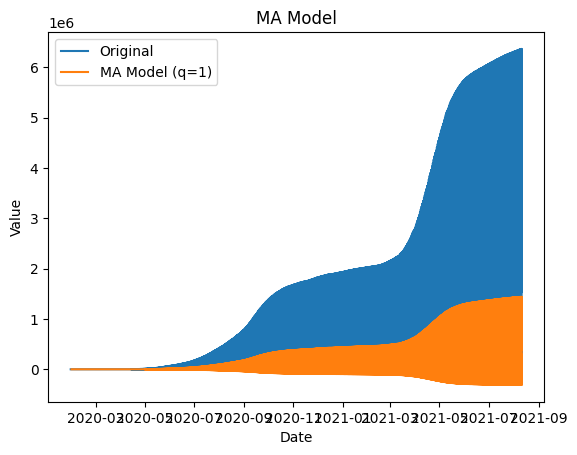

In [51]:
pt.plot(df['Confirmed'], label='Original')
pt.plot(predict, label='MA Model (q=1)')
pt.title('MA Model')
pt.xlabel('Date')
pt.ylabel('Value')
pt.legend()
pt.show()

In [57]:
# 3. ARMA(Autoregressive Moving Average)
from statsmodels.tsa.statespace.sarimax import SARIMAX
x = df['Confirmed']
p=1
q=1
arma_model = SARIMAX(x, order=(p, 0, q))
arma_model_fit = arma_model.fit()

In [58]:
arma_model_fit

In [59]:
print(arma_model_fit.summary())
predict = arma_model_fit.predict()
predict

                               SARIMAX Results                                
Dep. Variable:              Confirmed   No. Observations:                18110
Model:               SARIMAX(1, 0, 1)   Log Likelihood             -266784.112
Date:                Fri, 30 Jun 2023   AIC                         533574.225
Time:                        13:13:28   BIC                         533597.637
Sample:                             0   HQIC                        533581.921
                              - 18110                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   4.55e-05    2.2e+04      0.000       1.000       1.000
ma.L1         -0.9965      0.001  -1202.702      0.000      -0.998      -0.995
sigma2      4.682e+11   3.05e-17   1.54e+28      0.0

Date
2020-01-30         0.000000
2020-01-31         0.160254
2020-02-01         0.276235
2020-02-02         0.485423
2020-02-03         0.757559
                  ...      
2021-08-11    877801.275336
2021-08-11    876991.571368
2021-08-11    874226.172227
2021-08-11    872370.396816
2021-08-11    875218.331134
Name: predicted_mean, Length: 18110, dtype: float64

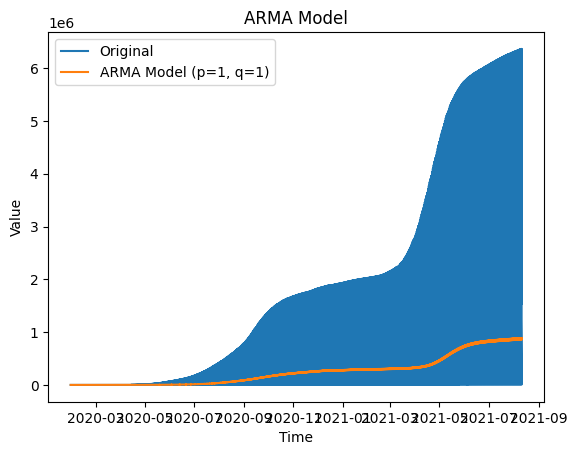

In [60]:
pt.plot(x, label='Original')
pt.plot(predict, label='ARMA Model (p=1, q=1)')
pt.title('ARMA Model')
pt.xlabel('Time')
pt.ylabel('Value')
pt.legend()
pt.show()

In [62]:
# 4. ARIMA(Autoregressive Integrate Moving Averages)
from statsmodels.tsa.arima.model import ARIMA
p=1
d=1
q=1
arima_model = ARIMA(x, order=(p, d, q))
arima_model_fit = arima_model.fit()


In [64]:
print(arima_model_fit.summary())
predict = arima_model_fit.predict()
predict

                               SARIMAX Results                                
Dep. Variable:              Confirmed   No. Observations:                18110
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -266610.649
Date:                Fri, 30 Jun 2023   AIC                         533227.299
Time:                        13:17:58   BIC                         533250.711
Sample:                             0   HQIC                        533234.996
                              - 18110                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0651      0.008     -8.270      0.000      -0.081      -0.050
ma.L1         -0.9966      0.001  -1944.028      0.000      -0.998      -0.996
sigma2      4.399e+11   1.26e-15    3.5e+26      0.0

Date
2020-01-30         0.000000
2020-01-31         0.467429
2020-02-01         0.652502
2020-02-02         0.934868
2020-02-03         1.293132
                  ...      
2021-08-11    775021.009460
2021-08-11    900252.063162
2021-08-11    934557.474799
2021-08-11    915471.476099
2021-08-11    829174.440358
Name: predicted_mean, Length: 18110, dtype: float64

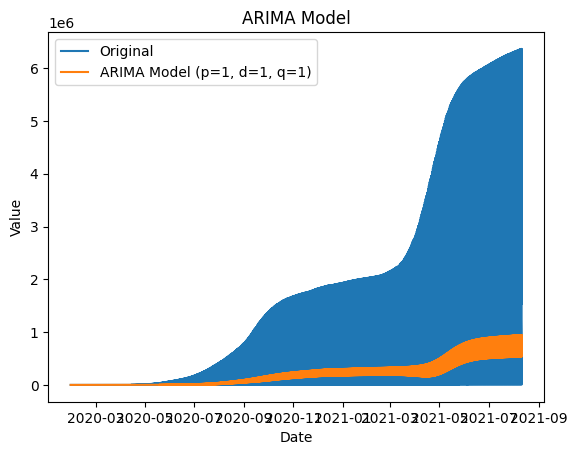

In [66]:
pt.plot(x, label='Original')
pt.plot(predict, label='ARIMA Model (p=1, d=1, q=1)')
pt.title('ARIMA Model')
pt.xlabel('Date')
pt.ylabel('Value')
pt.legend()
pt.show()